<a href="https://colab.research.google.com/github/hoangminhwer/do_an_thietkeweb/blob/main/DoAnTriTueNhanTao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
def initialize_centroids(img, k_clusters, init_type):
    if init_type == 'random':
        return np.random.randint(0, 256, size=(k_clusters, len(img[0])))
    elif init_type == 'in_pixels':
        return img[np.random.choice(img.shape[0], size=k_clusters), :]
    else:
        return None
def label_pixels(img, centroids):
    # With every pixel, get minimum distance (Euclidean distance) and label that pixel
    return np.argmin(np.linalg.norm(img - centroids[:, None], axis=2), axis=0)

def update_centroids(img, labels, old_centroids_shape):
    centroids = np.zeros(old_centroids_shape)

    # With every centroid
    for i in range(old_centroids_shape[0]):
        # Pixels in cluster i
        pixels = img[labels == i]

        # Calculate new centroid using mean on rows with each cluster
        if pixels.shape[0]: # Prevent nan values
            centroids[i] = np.mean(pixels, axis=0)

    return centroids
def kmeans(img_1d, k_clusters, max_iter, init_centroids):
    # Initialize cluster centroids and label
    centroids = initialize_centroids(img_1d, k_clusters, init_centroids)
    labels = np.full(img_1d.shape[0], -1)

    # Run K-means
    for i in range(max_iter):
        # Label every pixels with a centroid
        labels = label_pixels(img_1d, centroids)

        # Save old centroids
        old_centroids = centroids

        # Recompute centroids based on current clusters
        centroids = update_centroids(img_1d, labels, centroids.shape)

        # Check cenverges
        if np.allclose(old_centroids, centroids, rtol=10e-3, equal_nan=False):
            break

    return centroids, labels
from PIL import Image

# Input file name
input_file = 'cat.jpg'

# Open image
image = Image.open(input_file)

# Convert image to numpy arrays
image = np.array(image)

# Flat image to a 1D array to fit function's argument
flat_image = image.reshape(image.shape[0] * image.shape[1], image.shape[2])

# Init number of clusters
k_clusters = 12

# Init maximum iterator for stop criterion of K-means function
max_iter = 1000

# Init centroids type
init_centroids = 'random'
# Run K-means
centroids, labels = kmeans(flat_image, k_clusters, max_iter, init_centroids)
# With every pixel, replace that pixel with its centroid
result = centroids[labels].astype(np.uint8)

# Reshape to the original shape
result = result.reshape(image.shape)

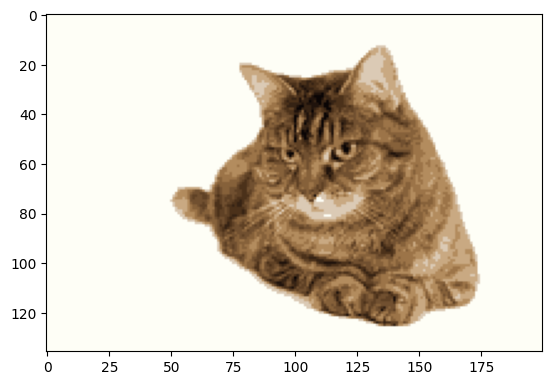

In [30]:
import matplotlib.pyplot as plt

# Hiển thị ảnh gốc và kết quả
plt.imshow(result)


In [ ]:
output_file = input_file.split('.')[0] + '_k' + str(k_clusters) + '.png'

# xuất ảnh sang file
Image.fromarray(result.astype(np.uint8)).save(output_file)

Xuất ảnh
